# `Retail Transaction Dataset: RFM Analysis`

# **Business Understanding**

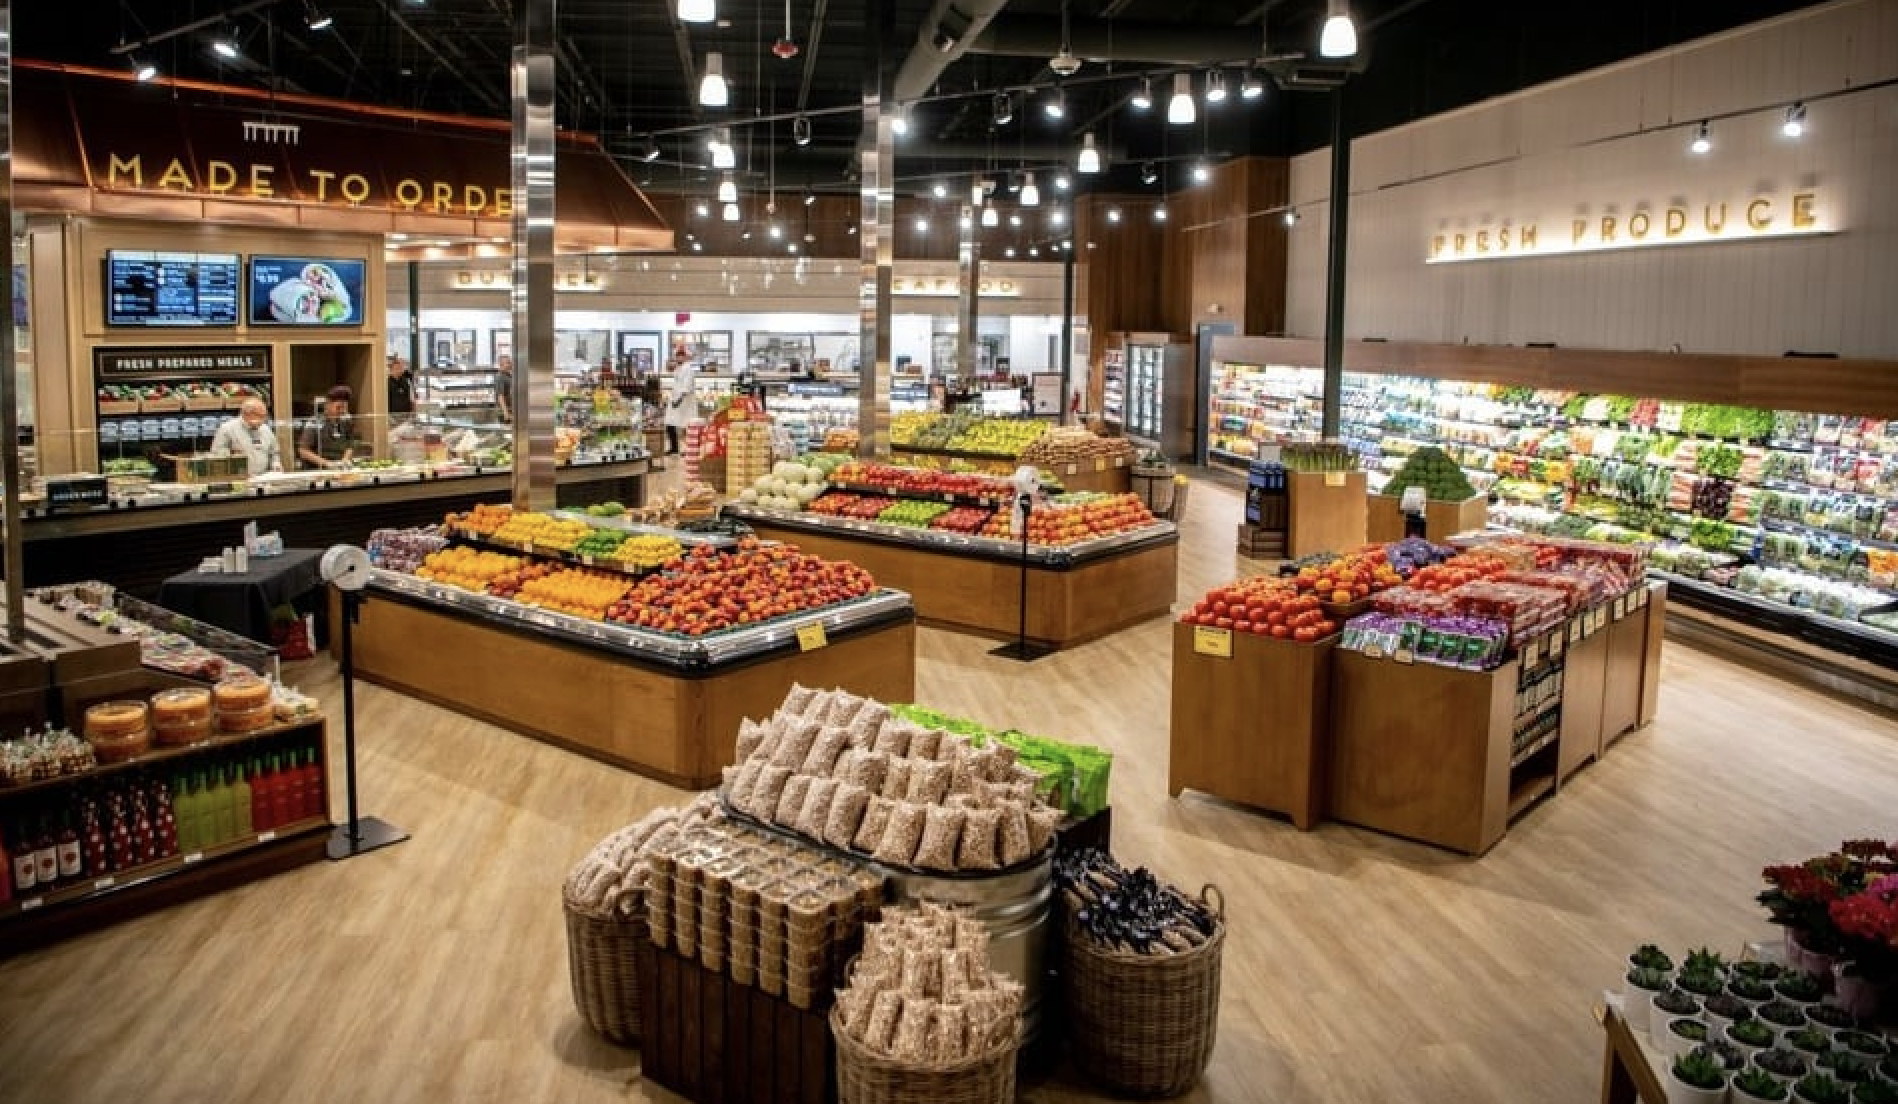




## **Background Context**

Dataset ini mencakup data transaksi pelanggan dari Mei 2011 sampai dengan Maret 2015 dari sebuah retail store. Tiap baris data menggambarkan aktivitas belanja pelanggan lengkap dengan waktu dan nominal berbelanja.

Selain transaksi, dataset ini juga menyajikan respons tiap pelanggan pada suatu campaign/promosi yang diluncurkan oleh perusahaan tersebut.  

## **Stakeholder**

Tim Marketing/Pemasaran merupakan stakeholder yang bertanggung jawab dalam menyusun strategi pemasaran yang tepat sasaran, berdasarkan informasi seperti perilaku pelanggan dan segmentasi pelanggan menurut kebiasaan belanja.

## **Problem Statement**

Perusahaan telah menjalankan sebuah program promosi/campaign untuk meningkatkan daya beli pelanggan. Namun, campaign yang dilakukan secara massal ini hanya menghasilkan tingkat respons (overall response rate) sebesar 9%, yang relatif rendah dan dinilai belum optimal.

Hal ini menimbulkan beberapa pertanyaan penting:

1. Apakah terdapat perbedaan tingkat respons antar segmen pelanggan?
2. Bagaimana segmentasi pelanggan perusahaan berdasarkan perilaku transaksi (recency, frequency, monetary)?
3. Segmen pelanggan mana yang paling banyak berkontribusi terhadap total penjualan dan revenue perusahaan?
4. Bagaimana efektivitas campaign pada masing-masing segmen, dan strategi apa yang lebih tepat untuk meningkatkan respons rate serta retensi pelanggan?

## **Goals**

1. Menyajikan segmentasi pelanggan berdasarkan metode RFM untuk memahami karakteristik dan perilaku tiap kelompok pelanggan.
2. Menghitung kontribusi penjualan dari masing-masing segmen untuk mengidentifikasi kelompok pelanggan yang paling berharga bagi perusahaan.
3. Mengukur respons rate dari setiap segmen pelanggan untuk mengetahui segmen mana yang paling responsif terhadap campaign.
4. Memberikan rekomendasi strategi marketing yang lebih tepat sasaran sesuai hasil segmentasi, kontribusi penjualan, dan respons rate, sehingga campaign menjadi lebih efektif dan efisien.

# Analytical Approach

## **RFM Analysis**
1. Analisis segmentasi pelanggan menggunakan RFM untuk mengidentifikasi kelompok-kelompok yang berbeda dengan menghitung recency, frequency, dan monetary masing-masing pelanggan.
2. Menghitung kontribusi penjualan dari masing-masing segmen pelanggan agar memberi gambaran segmen mana yang paling banyak menghasilkan revenue/sales, sehingga bisa jadi prioritas untuk strategi retensi.
3. Mengukur respons rate pada masing-masing segmen guna mengevaluasi efektivitas campaign dan menentukan strategi pemasaran yang lebih tepat sasaran.


### Import Modul

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

import plotly.express as px # Untuk visualisasi interaktif

#pd.set_option('display.max_rows',300)

### Data Understanding

In [ ]:
trx = pd.read_csv('/content/Retail_Data_Transactions.csv',parse_dates=['trans_date'])
trx

,customer_id,trans_date,tran_amount
0,CS5295,2013-02-11,35
1,CS4768,2015-03-15,39
2,CS2122,2013-02-26,52
3,CS1217,2011-11-16,99
4,CS1850,2013-11-20,78
...,...,...,...
124995,CS8433,2011-06-26,64
124996,CS7232,2014-08-19,38
124997,CS8731,2014-11-28,42
124998,CS8133,2013-12-14,13


Dataset transaksi terdiri dari 125000 baris dan 3 kolom:
- `customer_id`: primary key
- `trans_date`: tanggal transaksi
- `tran_amount`: nominal transaksi (dollar)

In [ ]:
trx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   customer_id  125000 non-null  object        
 1   trans_date   125000 non-null  datetime64[ns]
 2   tran_amount  125000 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.9+ MB


Tipe data sudah sesuai dan data tidak mengandung missing values.

In [ ]:
trx.describe()

,trans_date,tran_amount
count,125000,125000.000000
mean,2013-04-13 12:01:16.031999744,64.991912
min,2011-05-16 00:00:00,10.000000
25%,2012-04-29 00:00:00,47.000000
50%,2013-04-14 00:00:00,65.000000
75%,2014-03-28 00:00:00,83.000000
max,2015-03-16 00:00:00,105.000000
std,NaN,22.860006


Tidak terlihat adanya anomali pada data.

In [ ]:
trx[trx.duplicated(keep=False)].sort_values('customer_id')

,customer_id,trans_date,tran_amount
8479,CS2565,2012-09-14,67
91603,CS2565,2012-09-14,67
12521,CS2700,2011-10-23,48
14324,CS2700,2011-10-23,48
45968,CS2761,2014-03-03,75
77236,CS2761,2014-03-03,75
5116,CS3458,2015-02-11,40
59852,CS3458,2015-02-11,40
103710,CS7782,2014-12-30,70
105496,CS7782,2014-12-30,70


Terdapat beberapa data duplikat sehingga perlu di hapus.

In [ ]:
# menghapus data duplikat
trx = trx.drop_duplicates()

### Pre-processing

In [ ]:
# menentukan current date
trx['trans_date'].max()

Timestamp('2015-03-16 00:00:00')

Transaksi terakhir yang ada pada dataset adalah pada 16 Maret 2015. Dengan begitu, observasi dianggap dilakukan pada 1 April 2015.

In [ ]:
trx['customer_id'].nunique()

6889

Banyaknya customer adalah 6889 orang.

### Recency Values

Mengukur seberapa baru seorang pelanggan melakukan pembelian terakhir. Semakin baru pembelian dilakukan, semakin besar kemungkinan pelanggan tersebut untuk melakukan pembelian lagi.

In [ ]:
# Mengambil data tanggal transaksi terbaru tiap customer
trx_agg = trx.groupby('customer_id')['trans_date'].max().reset_index()
trx_agg

,customer_id,trans_date
0,CS1112,2015-01-14
1,CS1113,2015-02-09
2,CS1114,2015-02-12
3,CS1115,2015-03-05
4,CS1116,2014-08-25
...,...,...
6884,CS8996,2014-12-09
6885,CS8997,2014-06-28
6886,CS8998,2014-12-22
6887,CS8999,2014-07-02


In [ ]:
# Mendefinisikan tanggal sekarang (tanggal observasi)
trx_agg['current_date'] = '2015-04-01'
trx_agg['current_date'] = pd.to_datetime(trx_agg['current_date'])

In [ ]:
trx_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6889 entries, 0 to 6888
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   customer_id   6889 non-null   object        
 1   trans_date    6889 non-null   datetime64[ns]
 2   current_date  6889 non-null   datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 161.6+ KB


In [ ]:
trx_agg['recency_values'] = trx_agg['current_date']- trx_agg['trans_date']

In [ ]:
trx_agg

,customer_id,trans_date,current_date,recency_values
0,CS1112,2015-01-14,2015-04-01,77 days
1,CS1113,2015-02-09,2015-04-01,51 days
2,CS1114,2015-02-12,2015-04-01,48 days
3,CS1115,2015-03-05,2015-04-01,27 days
4,CS1116,2014-08-25,2015-04-01,219 days
...,...,...,...,...
6884,CS8996,2014-12-09,2015-04-01,113 days
6885,CS8997,2014-06-28,2015-04-01,277 days
6886,CS8998,2014-12-22,2015-04-01,100 days
6887,CS8999,2014-07-02,2015-04-01,273 days


### Frequency Values

Mengukur seberapa sering pelanggan melakukan pembelian dalam periode waktu tertentu. Pelanggan yang membeli lebih sering biasanya dianggap lebih setia dan berpotensi kembali.

In [ ]:
# Menghitung berapa kali customer berbelanja
freq_agg=trx.groupby('customer_id')['trans_date'].count().reset_index()
freq_agg

,customer_id,trans_date
0,CS1112,15
1,CS1113,20
2,CS1114,19
3,CS1115,22
4,CS1116,13
...,...,...
6884,CS8996,13
6885,CS8997,14
6886,CS8998,13
6887,CS8999,12


In [ ]:
# Cek apakah sudah benar
trx[trx['customer_id']=='CS1112']

,customer_id,trans_date,tran_amount
5650,CS1112,2015-01-14,39
17810,CS1112,2014-07-16,90
26626,CS1112,2014-04-29,63
31500,CS1112,2014-12-04,59
36486,CS1112,2012-04-08,56
40368,CS1112,2012-12-15,76
42084,CS1112,2013-07-01,36
67735,CS1112,2012-07-03,81
68206,CS1112,2011-10-02,60
74842,CS1112,2013-11-13,71


Sudah benar, customer dengan ID CS1112 berbelanja sebanyak 15 kali.

### Monetary Values

Menunjukkan jumlah uang yang dibelanjakan oleh pelanggan dalam periode tertentu. Semakin tinggi jumlah pengeluaran, semakin bernilai pelanggan tersebut bagi bisnis.

In [ ]:
# Menghitung total nominal transaksi tiap customer
mon_agg=trx.groupby('customer_id')['tran_amount'].sum().reset_index()
mon_agg

,customer_id,tran_amount
0,CS1112,1012
1,CS1113,1490
2,CS1114,1432
3,CS1115,1659
4,CS1116,857
...,...,...
6884,CS8996,582
6885,CS8997,543
6886,CS8998,624
6887,CS8999,383


In [ ]:
# Cek apakah sudah benar
trx[trx['customer_id']=='CS1112']['tran_amount']

,tran_amount
5650,39
17810,90
26626,63
31500,59
36486,56
40368,76
42084,36
67735,81
68206,60
74842,71


### RFM Table

Menggabungkan kolom customer_id, recency values, frequency values, dan monetary values.

In [ ]:
rfm_table = pd.merge(trx_agg,freq_agg,how='left',on='customer_id')
rfm_table = pd.merge(rfm_table, mon_agg, how='left',on='customer_id')
rfm_table

,customer_id,trans_date_x,current_date,recency_values,trans_date_y,tran_amount
0,CS1112,2015-01-14,2015-04-01,77 days,15,1012
1,CS1113,2015-02-09,2015-04-01,51 days,20,1490
2,CS1114,2015-02-12,2015-04-01,48 days,19,1432
3,CS1115,2015-03-05,2015-04-01,27 days,22,1659
4,CS1116,2014-08-25,2015-04-01,219 days,13,857
...,...,...,...,...,...,...
6884,CS8996,2014-12-09,2015-04-01,113 days,13,582
6885,CS8997,2014-06-28,2015-04-01,277 days,14,543
6886,CS8998,2014-12-22,2015-04-01,100 days,13,624
6887,CS8999,2014-07-02,2015-04-01,273 days,12,383


In [ ]:
rfm_table = rfm_table.drop(['trans_date_x','current_date'], axis=1)
rfm_table

,customer_id,recency_values,trans_date_y,tran_amount
0,CS1112,77 days,15,1012
1,CS1113,51 days,20,1490
2,CS1114,48 days,19,1432
3,CS1115,27 days,22,1659
4,CS1116,219 days,13,857
...,...,...,...,...
6884,CS8996,113 days,13,582
6885,CS8997,277 days,14,543
6886,CS8998,100 days,13,624
6887,CS8999,273 days,12,383


In [ ]:
rfm_table = rfm_table.rename(columns={'trans_date_y':'frequency_values', 'tran_amount':'monetary_values'})
rfm_table

,customer_id,recency_values,frequency_values,monetary_values
0,CS1112,77 days,15,1012
1,CS1113,51 days,20,1490
2,CS1114,48 days,19,1432
3,CS1115,27 days,22,1659
4,CS1116,219 days,13,857
...,...,...,...,...
6884,CS8996,113 days,13,582
6885,CS8997,277 days,14,543
6886,CS8998,100 days,13,624
6887,CS8999,273 days,12,383


In [ ]:
rfm_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6889 entries, 0 to 6888
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   customer_id       6889 non-null   object         
 1   recency_values    6889 non-null   timedelta64[ns]
 2   frequency_values  6889 non-null   int64          
 3   monetary_values   6889 non-null   int64          
dtypes: int64(2), object(1), timedelta64[ns](1)
memory usage: 215.4+ KB


In [ ]:
# Kalau recency_values sudah berupa timedelta
rfm_table['recency_values'] = rfm_table['recency_values'].dt.days

### Scoring Methodology
RFM Score menggunakan rentang 1-5:
1. Recency Score
1: Sudah lama sejak customer belanja
5: Customer baru saja belanja

2. Frequency Score
1: Pelanggan jarang sekali berbelanja
5: Pelanggan sangat sering berbelanja

3. Monetary Score
1: Total nominal belanja customer sangat kecil
5: Total nominal berlanja customer sangat besar

Data dibagi secara quantile (equal groups of five). Sumber: https://patchretention.com/blog/how-to-calculate-rfm-score

Berdasarkan RFM Score yang didapat, customer akan disegmentasi menggunakan rule seperti tabel di bawah ini.

Catatan: Jika dilihat, rule untuk nomor 11 dan 12 pada tabel sama, maka di antara dua segmen tersebut hanya dipakai yang Lost Customer sebagai istilah yang sering digunakan.

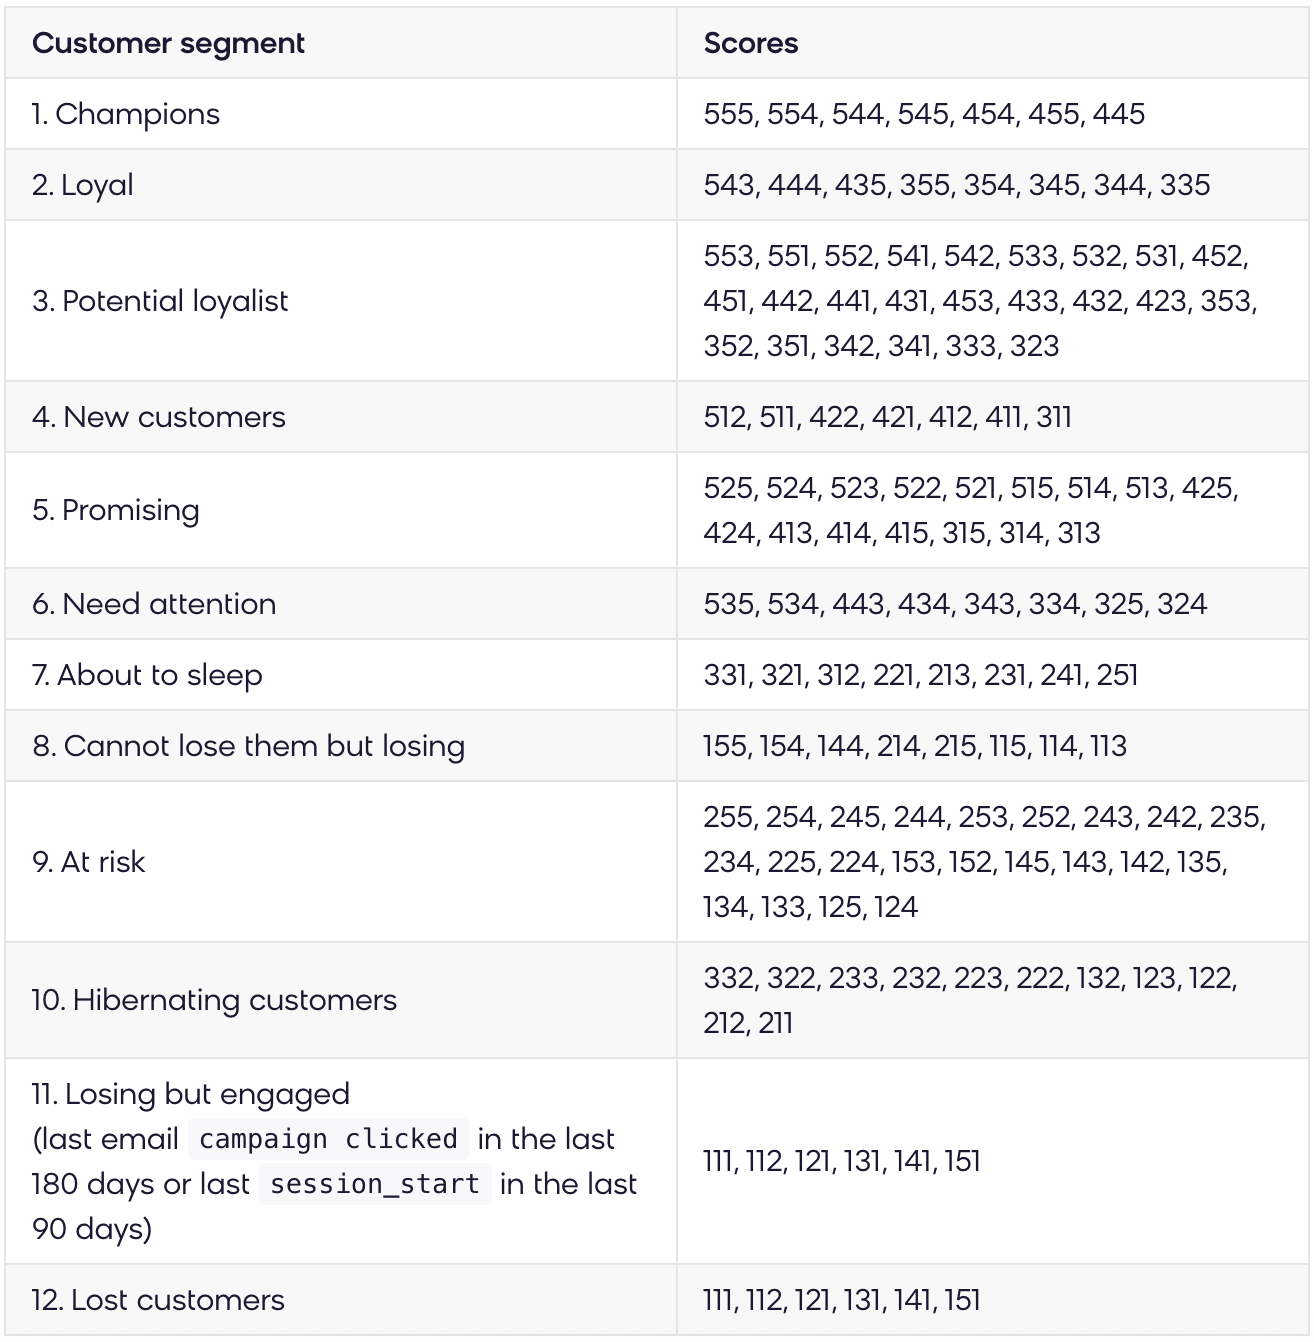

Sumber: https://documentation.bloomreach.com/engagement/docs/rfm-segmentation

In [ ]:
# Membagi data menjadi 5 bagian sama besar dan memberi label 1,2,3,4,dan 5
rfm_table['r_score'] = pd.qcut(rfm_table['recency_values'], 5, ['5','4','3','2','1'])
rfm_table['f_score'] = pd.qcut(rfm_table['frequency_values'].rank(method='first'), 5, ['1','2','3','4','5'])
rfm_table['m_score'] = pd.qcut(rfm_table['monetary_values'], 5, ['1','2','3','4','5'])
rfm_table


,customer_id,recency_values,frequency_values,monetary_values,r_score,f_score,m_score
0,CS1112,77,15,1012,3,2,2
1,CS1113,51,20,1490,4,4,4
2,CS1114,48,19,1432,4,3,4
3,CS1115,27,22,1659,5,4,5
4,CS1116,219,13,857,1,1,2
...,...,...,...,...,...,...,...
6884,CS8996,113,13,582,2,1,1
6885,CS8997,277,14,543,1,2,1
6886,CS8998,100,13,624,2,1,1
6887,CS8999,273,12,383,1,1,1


In [ ]:
# Melakukan concatenation sebagai RFM Score
rfm_table['RFM_Score'] = rfm_table.r_score.astype(str)+ rfm_table.f_score.astype(str) + rfm_table.m_score.astype(str)
rfm_table.head()


,customer_id,recency_values,frequency_values,monetary_values,r_score,f_score,m_score,RFM_Score
0,CS1112,77,15,1012,3,2,2,322
1,CS1113,51,20,1490,4,4,4,444
2,CS1114,48,19,1432,4,3,4,434
3,CS1115,27,22,1659,5,4,5,545
4,CS1116,219,13,857,1,1,2,112


In [ ]:
# Rule RFM Score untuk tiap segmen
# 1. Champions
champions = ["555","554","544","545","454","455","445"]

# 2. Loyal
loyal = ["543","444","435","355","354","345","344","335"]

# 3. Potential loyalist
potential_loyalist = [
    "553","551","552","541","542","533","532","531",
    "452","451","442","441","431","453","433","432",
    "423","353","352","351","342","341","333","323"
]

# 4. New customers
new_customers = ["512","511","422","421","412","411","311"]

# 5. Promising
promising = [
    "525","524","523","522","521","515","514","513",
    "425","424","413","414","415","315","314","313"
]

# 6. Need attention
need_attention = ["535","534","443","434","343","334","325","324"]

# 7. About to sleep
about_to_sleep = ["331","321","312","221","213","231","241","251"]

# 8. Cannot lose them but losing
cannot_lose = ["155","154","144","214","215","115","114","113"]

# 9. At risk
at_risk = [
    "255","254","245","244","253","252","243","242",
    "235","234","225","224","153","152","145","143",
    "142","135","134","133","125","124"
]

# 10. Hibernating customers
hibernating = ["332","322","233","232","223","222","132","123","122","212","211"]

# 11. Lost customers
lost_customers = ["111","112","121","131","141","151"]


# Fungsi untuk mapping
def assign_segment(rfm):
    if rfm in champions:
        return "Champions"
    elif rfm in loyal:
        return "Loyal"
    elif rfm in potential_loyalist:
        return "Potential loyalist"
    elif rfm in new_customers:
        return "New customers"
    elif rfm in promising:
        return "Promising"
    elif rfm in need_attention:
        return "Need attention"
    elif rfm in about_to_sleep:
        return "About to sleep"
    elif rfm in cannot_lose:
        return "Cannot lose them but losing"
    elif rfm in at_risk:
      return "At risk"
    elif rfm in hibernating:
      return "Hibernating customers"
    elif rfm in lost_customers:
      return "Lost customers"

# apply ke dataframe
rfm_table['Segment'] = rfm_table['RFM_Score'].apply(assign_segment)


In [ ]:
rfm_table

,customer_id,recency_values,frequency_values,monetary_values,r_score,f_score,m_score,RFM_Score,Segment
0,CS1112,77,15,1012,3,2,2,322,Hibernating customers
1,CS1113,51,20,1490,4,4,4,444,Loyal
2,CS1114,48,19,1432,4,3,4,434,Need attention
3,CS1115,27,22,1659,5,4,5,545,Champions
4,CS1116,219,13,857,1,1,2,112,Lost customers
...,...,...,...,...,...,...,...,...,...
6884,CS8996,113,13,582,2,1,1,211,Hibernating customers
6885,CS8997,277,14,543,1,2,1,121,Lost customers
6886,CS8998,100,13,624,2,1,1,211,Hibernating customers
6887,CS8999,273,12,383,1,1,1,111,Lost customers


In [ ]:
rfm_table.to_csv('rfm_table.csv',index=False) # Untuk keperluan dashboard

In [ ]:
rfm_table['Segment'].unique()

array(['Hibernating customers', 'Loyal', 'Need attention', 'Champions',
       'Lost customers', 'Promising', 'Potential loyalist',
       'New customers', 'At risk', 'Cannot lose them but losing',
       'About to sleep'], dtype=object)

In [ ]:
# Menghitung banyak customer tiap segmen
rfm_agg = rfm_table.groupby('Segment')['customer_id'].count().reset_index().rename(columns={'customer_id':'Count of Customer'})
rfm_agg

,Segment,Count of Customer
0,About to sleep,185
1,At risk,810
2,Cannot lose them but losing,254
3,Champions,1029
4,Hibernating customers,1224
5,Lost customers,566
6,Loyal,776
7,Need attention,243
8,New customers,727
9,Potential loyalist,800


In [ ]:
# Treemap hasil segmentasi
px.treemap(data_frame=rfm_agg,
           path=[px.Constant('Customer Segmentation'),'Segment'],
           values='Count of Customer',
           color='Count of Customer',
           color_continuous_scale='orrd')

# Analisis data respons

Data respons terdiri dari kolom `customer_id` dan `response` yg berbentuk angka biner (1: merespons campign, 0: tidak merespons campaign)

In [ ]:
resp = pd.read_csv('/content/Retail_Data_Response.csv')
resp

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [ ]:
resp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6884 entries, 0 to 6883
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  6884 non-null   object
 1   response     6884 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 107.7+ KB


Data respons juga tidak memiliki missing values.

In [ ]:
resp.describe()

,response
count,6884.000000
mean,0.093986
std,0.291831
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
resp['response'].unique()

array([0, 1])

Tidak ditemukan anomali juga pada data respons.

In [ ]:
# Join tabel respons ke hasil analisis segmentasi RFM
response=pd.merge(rfm_table,resp,how='left',on='customer_id')
response

,customer_id,recency_values,frequency_values,monetary_values,r_score,f_score,m_score,RFM_Score,Segment,response
0,CS1112,77,15,1012,3,2,2,322,Hibernating customers,0.0
1,CS1113,51,20,1490,4,4,4,444,Loyal,0.0
2,CS1114,48,19,1432,4,3,4,434,Need attention,1.0
3,CS1115,27,22,1659,5,4,5,545,Champions,1.0
4,CS1116,219,13,857,1,1,2,112,Lost customers,1.0
...,...,...,...,...,...,...,...,...,...,...
6884,CS8996,113,13,582,2,1,1,211,Hibernating customers,0.0
6885,CS8997,277,14,543,1,2,1,121,Lost customers,0.0
6886,CS8998,100,13,624,2,1,1,211,Hibernating customers,0.0
6887,CS8999,273,12,383,1,1,1,111,Lost customers,0.0


In [ ]:
response[response['response'].isna()]

,customer_id,recency_values,frequency_values,monetary_values,r_score,f_score,m_score,RFM_Score,Segment,response
5185,CS7297,759,5,251,1,1,1,111,Lost customers,NaN
5301,CS7413,781,6,349,1,1,1,111,Lost customers,NaN
5526,CS7638,873,5,275,1,1,1,111,Lost customers,NaN
6264,CS8376,849,4,239,1,1,1,111,Lost customers,NaN
6641,CS8753,754,11,497,1,1,1,111,Lost customers,NaN


In [ ]:
response[response['Segment']=='Lost customers']['response'].mode()

,response
0,0.0


Terdapat 5 customer yang response nya tidak diketahui (missing values). Jika dilihat segmentasinya, customer-customer tersebut masuk ke dalam segmen 'Lost Customers'. dan karena kebanyakan customers yg berada di segmen lost customer tidak merespons campaign (response =0). maka 5 customer ini response nya yang tadinya NaN akan diganti menjadi 0 juga (tidak merespons campaign).

In [ ]:
response['response']=response['response'].fillna(0)

In [ ]:
response.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6889 entries, 0 to 6888
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customer_id       6889 non-null   object  
 1   recency_values    6889 non-null   int64   
 2   frequency_values  6889 non-null   int64   
 3   monetary_values   6889 non-null   int64   
 4   r_score           6889 non-null   category
 5   f_score           6889 non-null   category
 6   m_score           6889 non-null   category
 7   RFM_Score         6889 non-null   object  
 8   Segment           6889 non-null   object  
 9   response          6889 non-null   float64 
dtypes: category(3), float64(1), int64(3), object(3)
memory usage: 397.7+ KB


In [ ]:
def assign_response(res):
    if res == 0:
        return "No"
    elif res == 1:
        return "Yes"

# apply ke dataframe
response['res_desc'] = response['response'].apply(assign_response)

In [ ]:
response.head()

,customer_id,recency_values,frequency_values,monetary_values,r_score,f_score,m_score,RFM_Score,Segment,response,res_desc
0,CS1112,77,15,1012,3,2,2,322,Hibernating customers,0.0,No
1,CS1113,51,20,1490,4,4,4,444,Loyal,0.0,No
2,CS1114,48,19,1432,4,3,4,434,Need attention,1.0,Yes
3,CS1115,27,22,1659,5,4,5,545,Champions,1.0,Yes
4,CS1116,219,13,857,1,1,2,112,Lost customers,1.0,Yes


In [ ]:
response['res_desc'].unique()

array(['No', 'Yes'], dtype=object)

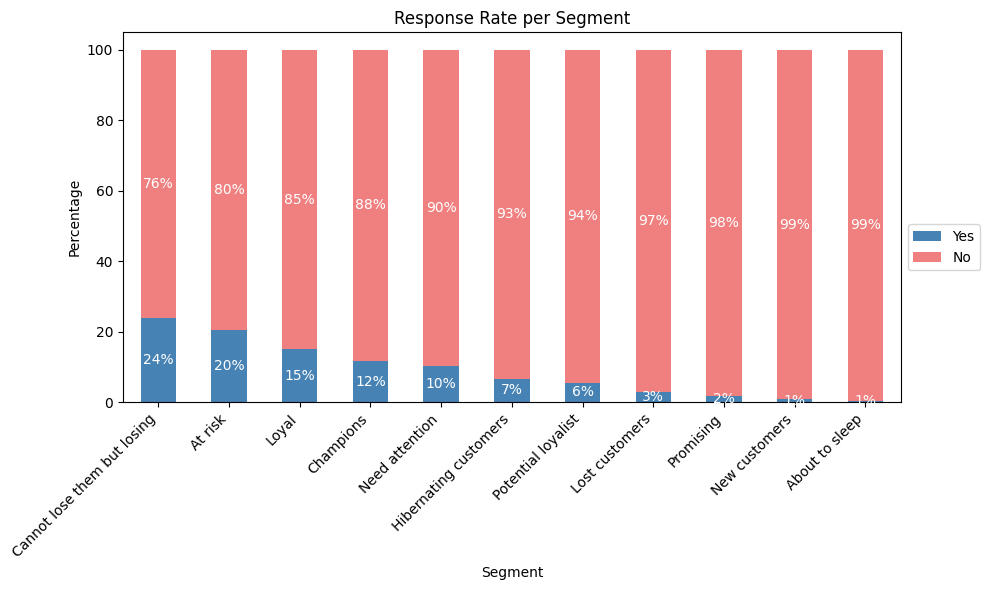

In [ ]:
# Hitung jumlah response per segment
resp_counts = response.groupby(["Segment", "response"]).size().reset_index(name="count")

# Pivot biar jadi format wide
resp_pivot = resp_counts.pivot(index="Segment", columns="response", values="count").fillna(0)

# Hitung persentase
resp_pivot_perc = resp_pivot.div(resp_pivot.sum(axis=1), axis=0) * 100

# Urutkan berdasarkan response = 1 (Yes) tertinggi
resp_pivot_perc = resp_pivot_perc.sort_values(by=1, ascending=False)

# Plot stacked bar dengan Yes di bawah
ax = resp_pivot_perc[[1,0]].plot(   # penting: urutkan kolom [Yes, No]
    kind="bar", stacked=True, figsize=(10,6),
    color=["steelblue", "lightcoral"]
)

# Tambahin label persentase di dalam bar
for c in ax.containers:
    ax.bar_label(c, fmt="%.0f%%", label_type="center", color="white", fontsize=10)

plt.ylabel("Percentage")
plt.title("Response Rate per Segment")
plt.legend(
    ["Yes", "No"],              # sesuaikan dengan urutan kolom
    loc="upper left",
    bbox_to_anchor=(1, 0.5)     # taruh di kanan luar
)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Pelanggan pada segmen “Can’t lose them” dan “At risk” memiliki response rate tertinggi > 20%. Artinya, dari 100 orang yang diberikan campaign, sekitar 20 orang lebih merespons campaign tersebut.

Sedangkan, hampir semua pelanggan di segmen “Lost customers’, “Promising”, “New customers”, dan “About to sleep” tidak merespons campaign.

In [ ]:
res_agg = response.groupby('Segment').agg(
    response_rate = ('response', 'mean'),
    total_sales   = ('monetary_values', 'sum'),
    total_customer = ('customer_id', 'count')
).reset_index()

res_agg

In [ ]:
fig = px.scatter(
    res_agg,
    x="response_rate",
    y="total_sales",
    size="total_customer",
    color="Segment",
    hover_name="Segment",
    title="Response Rate vs Total Sales"
)

# Hitung rata-rata
avg_response = res_agg["response_rate"].mean()
avg_sales = res_agg["total_sales"].mean()

# Menambahkan garis rata-rata ke plot
fig.add_vline(x=avg_response, line_dash="dash", line_color="red",
              annotation_text="Overall Response Rate", annotation_position="top left")
fig.add_hline(y=avg_sales, line_dash="dash", line_color="blue",
              annotation_text="Avg Total Sales", annotation_position="bottom right")

fig.show()


In [ ]:
response.to_csv('response.csv',index=False) # Untuk Dashboard Looker

## Menghitung Response Rate dan Lift

Sumber:
1. https://curogram.com/blog/how-to-calculate-response-rate

2. https://en.wikipedia.org/wiki/Lift_(data_mining)#:~:text=Lift%20is%20simply%20the%20ratio,4.0%20(20%25%2F5%25)

In [ ]:
# Hitung overall response rate
overall_rate = response['response'].mean()

# Hitung response rate per segment
seg_rate = response.groupby('Segment')['response'].mean().reset_index()
seg_rate.rename(columns={'response': 'response_rate'}, inplace=True)

# Hitung lift relatif terhadap overall
seg_rate['lift'] = seg_rate['response_rate'] / overall_rate

In [ ]:
seg_rate=seg_rate.sort_values('lift',ascending=False)
seg_rate

In [ ]:
fig = px.bar(
    seg_rate,
    x='Segment',
    y='lift',
    text='lift',
    title="Relative Lift per Segment",
    labels={'lift': 'Lift (vs Overall)'}
)

# biar angka lift muncul di atas bar
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

fig.show()


Segmen 'cannot lose them' dan 'at risk' 2 kali lebih responsif dibanding rata-rata.

Artinya pelanggan di segmen tersebut merespon campaign dua kali lebih banyak dibandingkan rata-rata semua pelanggan.

Kalau dari 100 pelanggan rata-rata cuma 10 orang merespon, di segmen 'cannot lose them' dan 'at risk' bisa ada 20 orang yang merespon.